<a href="https://colab.research.google.com/github/StevenBryceLee/DS-Unit-4-Sprint-1-NLP/blob/main/module2-vector-representations/Copy_of_LS_DS_422_BOW_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [ ]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
!pip install -r requirements.txt

--2020-09-29 16:11:59--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     137  --.-KB/s    in 0s      

2020-09-29 16:12:00 (9.76 MB/s) - ‘requirements.txt’ saved [137/137]

     |████████████████████████████████| 24.2MB 1.3MB/s 
     |████████████████████████████████| 1.6MB 53.1MB/s 
     |████████████████████████████████| 10.4MB 47.9MB/s 
     |████████████████████████████████| 7.1MB 46.5MB/s 
     |████████████████████████████████| 215kB 42.6MB/s 
     |████████████████████████████████| 2.2MB 44.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.w

In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=ddb7455da02d6b670a9ad0e299fc1d13e10e77f47da3ff8dc30736e7b0462769
  Stored in directory: /tmp/pip-ephem-wheel-cache-4fr_55xf/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

In [ ]:
nlp = spacy.load('en_core_web_lg')

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [ ]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv

--2020-09-29 16:18:15--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1670819 (1.6M) [text/plain]
Saving to: ‘job_listings.csv’

job_listings.csv    100%[===================>]   1.59M  8.87MB/s    in 0.2s    

2020-09-29 16:18:15 (8.87 MB/s) - ‘job_listings.csv’ saved [1670819/1670819]



In [ ]:
from bs4 import BeautifulSoup
import requests
df = pd.read_csv('job_listings.csv')



In [ ]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [ ]:
df.description[0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [ ]:
soup = BeautifulSoup(df.description[0])
text = soup.get_text()
text.replace('\\n',' ')

'b"Job Requirements: Conceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL/Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field. Apply Now"'

In [ ]:
new_col = df.description.apply(lambda x: BeautifulSoup(x).get_text().replace('\\n',' ').repla[1:])
new_col.head()

0    "Job Requirements: Conceptual understanding in...
1    'Job Description  As a Data Scientist 1, you w...
2    'As a Data Scientist you will be working on co...
3    '$4,969 - $6,756 a monthContractUnder the gene...
4    'Location: USA \xe2\x80\x93 multiple locations...
Name: description, dtype: object

In [ ]:
cleaned_col = new_col.apply(lambda x: re.sub('[^a-zA-Z ]', '', x))
cleaned_col.head()

0    Job Requirements Conceptual understanding in M...
1    Job Description  As a Data Scientist  you will...
2    As a Data Scientist you will be working on con...
3       a monthContractUnder the general supervisio...
4    Location USA xexx multiple locations  years of...
Name: description, dtype: object

In [ ]:
df['clean_description'] = cleaned_col

## 2) Use Spacy to tokenize the listings 

In [ ]:
from spacy.tokenizer import Tokenizer
tokenizer = Tokenizer(nlp.vocab)

tokens = []
for doc in tokenizer.pipe(df['clean_description'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.text is not ' '):
            doc_tokens.append(token.lemma_.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens
df['tokens'].head()

0    [job, requirements, conceptual, understand, ma...
1    [job, description, data, scientist, help, buil...
2    [data, scientist, work, consult, business, res...
3    [   , monthcontractunder, general, supervision...
4    [location, usa, xexx, multiple, location, year...
Name: tokens, dtype: object

In [ ]:
df['tokens'][0][:5]

['job', 'requirements', 'conceptual', 'understand', 'machine']

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [ ]:
df['joined_tokens'] = df['tokens'].apply(lambda x: ' '.join(x))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# create the transformer
vect = CountVectorizer()

# build vocab
vect.fit(df['joined_tokens'])

# transform text
dtm = vect.transform(df['joined_tokens'])

In [ ]:
dtmdf = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtmdf.head()

,aa,aaai,aaeeo,aas,ab,abernathy,abilities,ability,able,abmultivariate,abound,abroad,absence,absolutely,absorb,abstract,abstraction,abstractly,abtest,abundant,abuse,academia,academic,academy,accelerate,acceleration,accelerator,accelerometer,accept,acceptable,acceptance,acceptapprove,acceptedcurrent,access,accessibility,accessible,accidental,accolade,accommodate,accommodation,...,years,yearsexperience,yearsummary,yearsxexx,yearthe,yeartitle,yearworking,yearxexxs,yes,yeti,yield,york,youd,youll,young,youre,yoursxexxis,youtube,youve,youxexx,youxexxaprotect,youxexxd,youxexxll,youxexxre,youxexxve,yr,zenreach,zero,zeus,zf,zfxexxs,zheng,zillow,zillows,zogsports,zone,zoom,zuckerberg,zurich,zurichxexxs
0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [ ]:
x = [sum(dtmdf[col]) for col in dtmdf.columns]

In [ ]:
visSeries = pd.Series(x, index = dtmdf.columns).sort_values(ascending=False)
visSeries.head()

datum         3393
experience    1976
work          1576
team          1346
business      1231
dtype: int64

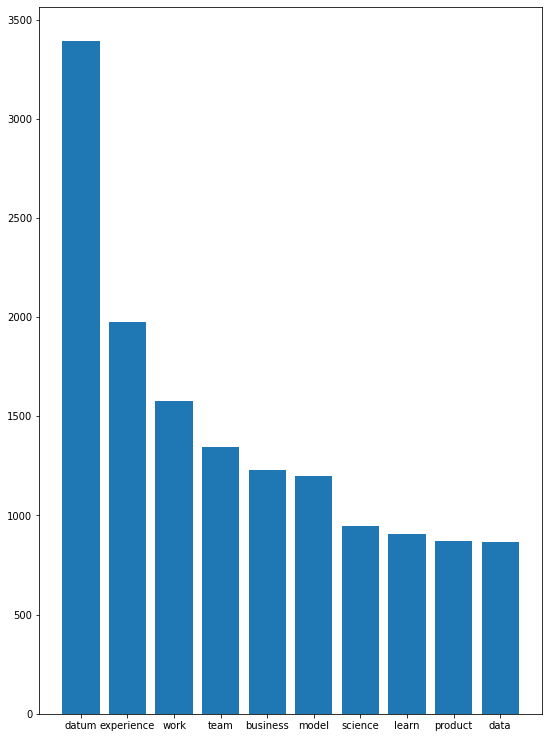

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,13))
plt.bar(visSeries.index[:10], visSeries.values[:10])
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [ ]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True) & (token.text is not ' ')]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2),
                        max_df=.97,min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(df['joined_tokens'])

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,,experience,job,look,prefer,qualification,role,work,year,yearsxexx,ab,ab test,ability,ability analyze,ability apply,ability build,ability clearly,ability collaborate,ability communicate,ability create,ability deliver,ability develop,ability drive,ability effectively,ability experience,ability explain,ability identify,ability lead,ability learn,ability manage,ability perspective,ability present,ability require,ability solve,ability think,ability translate,ability understand,ability use,ability work,ability write,...,xcxbb experience,xcxbb familiarity,xefxx,xefxx communicate,xefxx deliver,xefxx endtoend,xefxx expertise,xefxx lead,xefxx run,xefxx vudu,xexx,xexx happen,xexxa,xexxbig,xexxcbig,xexxcbig dataxexxd,year,year analytic,year datum,year experience,year handson,year industry,year professional,year relate,year relevant,year work,yearsxexx,yearsxexx experience,yes,york,york city,youxexxll,youxexxll develop,youxexxll need,youxexxll partner,youxexxll work,youxexxre,youxexxre look,youxexxve,yr
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096994,0.0,0.0,0.0,0.0,0.0,0.118879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.141003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021963,0.0,0.0,0.0,0.0,0.0,0.053838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.019654,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046593,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.075772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.156096,0.0,0.0,0.0,0.0,0.0,0.080824,0.303807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
query = [df['joined_tokens'][334]]
new = tfidf.transform(query)

results = nn.kneighbors(new.todense())

In [ ]:
results[0][0][1]

0.0

In [ ]:
df['joined_tokens'][334]

'minimum qualification masters degree operations research industrial engineering statistics relate field equivalent practical experience year relevant work experience eg datum scientist equivalent analytical engagement outside class work school include experience statistical software eg r python database language eg sql preferred qualification phd operations research industrial engineering statistics relate field    year relevant work experience eg datum scientist include experience apply advance analytics plan infrastructure problem experience design build statistical forecast model experience design build machine learn model excellent problemframing problemsolving project management skill excellent customer service team collaboration skill job google datum drive decisionmaking data scientists work organization help shape googles business technical strategy process analyze interpret huge datum set analytic rigor statistical method datum identify opportunity google client operate effic

In [ ]:
df.iloc[[334, 275, 240, 359, 276],:]

,Unnamed: 0,description,title,clean_description,tokens,joined_tokens
334,334,"b""<b>Minimum qualifications:</b><br/>\nMaster'...","Data Scientist, Operations Data Science",Minimum qualifications Masters degree in Opera...,"[minimum, qualification, masters, degree, oper...",minimum qualification masters degree operation...
275,275,"b""<b>Minimum qualifications:</b><br/>\nMaster'...","Data Scientist, Operations Data Science",Minimum qualifications Masters degree in Opera...,"[minimum, qualification, masters, degree, oper...",minimum qualification masters degree operation...
240,240,"b""<b>Minimum qualifications:</b><br/>\nMaster'...","Data Scientist, Operations Data Science",Minimum qualifications Masters degree in Opera...,"[minimum, qualification, masters, degree, oper...",minimum qualification masters degree operation...
359,359,b'<div><p>Maximizing our potential as a learni...,Sr. Data Scientist – Data for Insights Practice,Maximizing our potential as a learning organis...,"[maximizing, potential, learn, organise, centr...",maximizing potential learn organise central me...
276,276,"b""<div><div><div>Facebook's mission is to give...","Data Scientist, Infrastructure",Facebooks mission is to give people the power ...,"[facebooks, mission, people, power, build, com...",facebooks mission people power build community...


## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 

https://colab.research.google.com/drive/1-8OUgoAo5aKCXnSJnE6f_5iqMqOrs92m?usp=sharing#scrollTo=OqIahDThiHnF